# The Goal:
## Create a model that given a level in our business can give the correct salary.
This exericse serves as a way to learn the basics of polynomial regression.

## Imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error


## Importing the dataset.

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')


## Let's see how Position Level relates to Salary.

[]

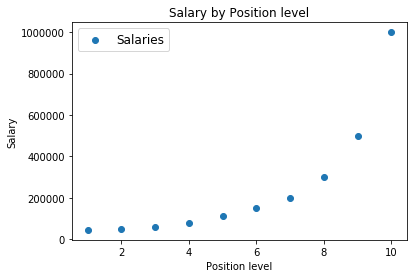

In [3]:
salaries = plt.scatter(dataset['Level'],dataset['Salary'])
plt.title('Salary by Position level')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend((salaries,),('Salaries',),loc='upper left', fontsize=12)
plt.plot()
           

We now can see that polynomial regression should be the right choice for a regression model.

## Spliting data into independent variables (X) and dependent variables (y).

In [4]:
X = pd.DataFrame(dataset['Level'], columns=['Level'])
y = pd.DataFrame(dataset['Salary'], columns=['Salary'])

We don't use the Position feature as an independent variable because it is simply a label for the Level feature.

## Take a look at X.

In [5]:
X


,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


## Take a look at y.

In [6]:
y


,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


## Note:
#### We do not split the data into training and testing data.
We don't have enough data to split it and still make accurate predictions.
This does raise a concern about overfitting.

## Here we fit a basic linear regression model to the dataset.

In [7]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Let's see how our models predictions compare to the actual salaries.

[]

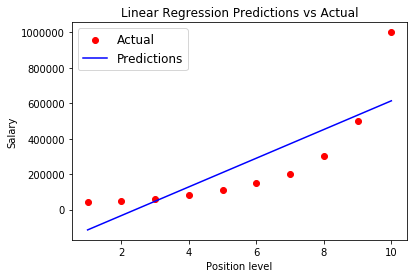

In [8]:
predictions = linear_regressor.predict(X)
actual = plt.scatter(X, y, color = 'red')
pred = plt.plot(X, predictions, color = 'blue')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend((actual,pred[0]),('Actual','Predictions'),loc='upper left', fontsize=12)
plt.plot()


We can see that our basic linear regression model does not do a very good job of predicting salaries.

## Let's just check the mean absolute error so we can see just how off we are.

In [9]:
mae = mean_absolute_error(predictions,y)
mae


128454.54545454546

We are off by over 120k on average, this is certainly not an acceptable model for predicting salaries.

## Here we are adding polynomial features to our X matrix and defining it as X_poly.

In [10]:
polynomial_feature = PolynomialFeatures(degree = 4, include_bias=False)
X_poly = polynomial_feature.fit_transform(X)

The degree specified is what power to raise X to. I have decided on 4 after testing degrees both above and below this value.
We set the include_bias parameter to False as the libraries we are working with do not require us to have a bias in our matrix.
The libaries we are working with add in the bias for the linear regression equation silently.

## Let's take a look at our new independent matrix: X_poly.

In [11]:
pd.DataFrame(X_poly,columns=['Level','Level^2','Level^3','Level^4'])


,Level,Level^2,Level^3,Level^4
0,1.0,1.0,1.0,1.0
1,2.0,4.0,8.0,16.0
2,3.0,9.0,27.0,81.0
3,4.0,16.0,64.0,256.0
4,5.0,25.0,125.0,625.0
5,6.0,36.0,216.0,1296.0
6,7.0,49.0,343.0,2401.0
7,8.0,64.0,512.0,4096.0
8,9.0,81.0,729.0,6561.0
9,10.0,100.0,1000.0,10000.0


We can see there is are 3 new features in our X matrix, one for each degree after 1 up to the degree specified (4).

## Here we fit a linear regression model to the dataset based on our new features.
This is what polynomial regression is, a linear regression model based on polynomial features we create.

In [12]:
linear_regressor_poly = LinearRegression()
linear_regressor_poly.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Let's see if this model does any better than our first.

[]

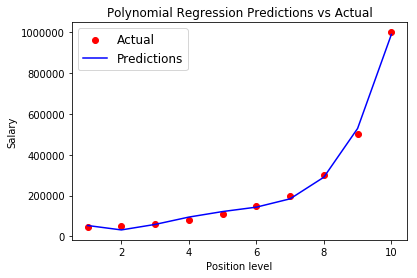

In [13]:
predictions = linear_regressor_poly.predict(X_poly)
actual = plt.scatter(X, y, color = 'red')
pred = plt.plot(X, predictions, color = 'blue')
plt.title('Polynomial Regression Predictions vs Actual')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend((actual,pred[0]),('Actual','Predictions'),loc='upper left', fontsize=12)
plt.plot()


We can see that our polynomial regression model does a much better job.

## As before let's see mean absolute error.

In [14]:
mae = mean_absolute_error(predictions,y)
mae


12681.81818182312

We can see that we are only off by around 12k this time.
Using polynomial regression certainly made a drastic difference.
In the future we could make an even better model, using various methods that I am still learning.

### Note
The Position_Salaries.csv was taken from the Machine Learning A-Z™: Hands-On Python & R In Data Science course offered on Udemy.
This served as an exercise for me to learn what polynomial regression is and how to implement it.